In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/Github/SSM/")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\Github\SSM`


In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using Random
using .SSM
using Distributions
using Plots

In [3]:
# generate data from a "switching gaussian regression"
n = 100

A = [0.9 0.1; 0.1 0.9]
β₁, β₂ = [1.0, 2.0], [2.0, 1.0]
σ²₁, σ²₂ = 1.0, 0.5

X = randn(n, 1)
X = [ones(n) X]

Y = zeros(n)
S = zeros(n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5))
    else
        S[i] = rand(Bernoulli(A[Int(S[i-1]) + 1, 1]) )
    end
    if S[i] == 0
        Y[i] = X[i, :]'*β₁ + rand(Normal(0, sqrt(σ²₁)))
    else
        Y[i] = X[i, :]'*β₂ + rand(Normal(0, sqrt(σ²₂)))
    end
end

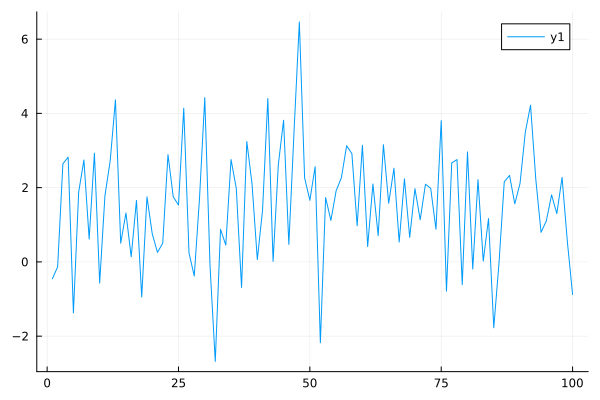

In [4]:
plot(Y)

In [5]:
model = SwitchingGaussianRegression(;K=2)

SwitchingGaussianRegression{Float64}([0.5876573092342341 0.41234269076576574; 0.751685923383591 0.24831407661640909], RegressionEmissions[RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true)), RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true))], [0.3166859784078491, 0.6833140215921509], 2)

In [6]:
ll = SSM.fit!(model, reshape(X[:, 2], length(X[:, 2]), 1), Y, 1000, 1e-3, true)

Log-Likelihood at iter 1: -207.32643932471083
Log-Likelihood at iter 2: -140.5260646117696
Log-Likelihood at iter 3: -135.91000150000664
Log-Likelihood at iter 4: -134.40829666353804
Log-Likelihood at iter 5: -133.39172677317717
Log-Likelihood at iter 6: -132.68361271374764
Log-Likelihood at iter 7: -132.18438056881095
Log-Likelihood at iter 8: -131.8145982907837
Log-Likelihood at iter 9: -131.5257882537574
Log-Likelihood at iter 10: -131.29531324408015
Log-Likelihood at iter 11: -131.11410530496397
Log-Likelihood at iter 12: -130.97653898217578
Log-Likelihood at iter 13: -130.87567450387056
Log-Likelihood at iter 14: -130.8030716049024
Log-Likelihood at iter 15: -130.75049430145992
Log-Likelihood at iter 16: -130.71127263140897
Log-Likelihood at iter 17: -130.68067209849386
Log-Likelihood at iter 18: -130.65561648039937
Log-Likelihood at iter 19: -130.63421975118456
Log-Likelihood at iter 20: -130.615367253394
Log-Likelihood at iter 21: -130.59841220281268
Log-Likelihood at iter 22: -

1001-element Vector{Float64}:
  -Inf
 -207.32643932471083
 -140.5260646117696
 -135.91000150000664
 -134.40829666353804
 -133.39172677317717
 -132.68361271374764
 -132.18438056881095
 -131.8145982907837
 -131.5257882537574
    ⋮
 -130.4037001271547
 -130.4037001271546
 -130.4037001271547
 -130.4037001271549
 -130.4037001271547
 -130.40370012715454
 -130.40370012715474
 -130.40370012715456
 -130.4037001271546

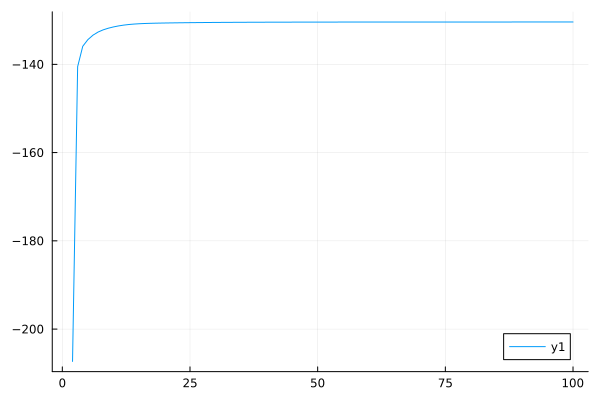

In [7]:
plot(ll[1:100])

100-element Vector{Int64}:
 2
 2
 2
 1
 2
 2
 1
 2
 1
 2
 ⋮
 1
 2
 1
 2
 1
 2
 1
 2
 2

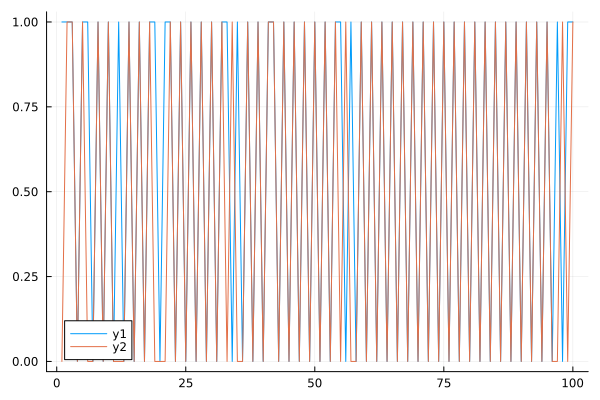

In [20]:
plot(SSM.viterbi(model, reshape(X[:, 2], length(X[:, 2]), 1), Y).-1)
plot!(1 .- S) # thes states are flipped, so i subtract from 1 to get the correct plot